In [1]:
#imports
from ramp_funct_dev import plot_trace
import sorting_functions as sort
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import detect_peaks as peaks
import human_characterisation_functions as hcf
import numpy as np

/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/detect_peaks.py:11: UserWarning: A newest version is available at https://pypi.org/project/detecta/
  warnings.warn('A newest version is available at https://pypi.org/project/detecta/')


In [2]:
human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/'
patcher = 'Verji'

# Table of Contents


[OP220413](#1)  
[OP220615](#2)    
[OP221116](#3)   
[OP230126](#4)   
[OP230329](#5)   
[OP230330](#6)   
[OP230417](#7)  
[OP230914](#8)

# OP220413 <a name= "1">
patient age:  

region: temporal

Experiments
- long curernt clamp recordings in whole-cell patch configuration
- washing in (s1) or 
- washing out (s2-s4, S1_d2) high K **(15mM)**

Results
- wash in of high K --> increase in RMP
- wash out of high K --> decreae in RMP
- no spiking observed

In [41]:
OP = 'OP220413'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)
summary_df = pd.read_excel(human_dir + '/data_verji/' + OP + '/data_tables/RMP_summary.xlsx')

In [42]:
mask = (summary_df.RMP > -90) & (summary_df.RMP < 0)
df = summary_df.loc[mask,:]
df = df.drop(df[(df.slice == 'S1') & (df.channel == 1) | (df.channel == 3)].index) #cells not healthy
df = df.drop(df[(df.slice == 'S2') & (df.channel == 1)].index) #cells not healthy

In [43]:
wash_out_start_s1 = datetime.datetime.strptime('220413 23:53', '%y%m%d %H:%M')

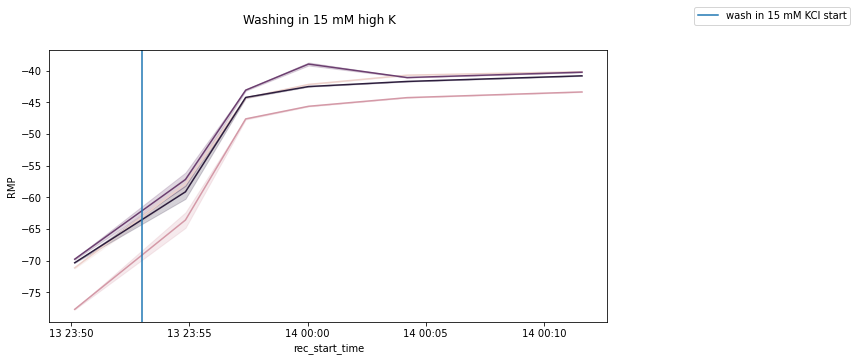

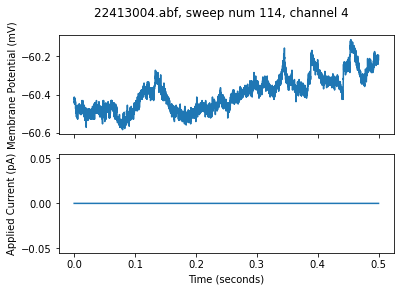

In [46]:
fig, ax = plt.subplots(1,1, figsize = (10,5)) 
ax = sns.lineplot(data=df[df.slice == 'S1'], x="rec_start_time", y="RMP",hue = 'channel', legend = False)
ax.axvline(x = wash_out_start_s1, label = 'wash in 15 mM KCl start')
fig.suptitle('Washing in 15 mM high K')
plt.figlegend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plot_trace(human_dir + '/data_verji/OP220413/22413004.abf', 113, 4)


In [10]:
wash_out_start_s2 = datetime.datetime.strptime('220414 01:40', '%y%m%d %H:%M')
wash_out_start_s3 = datetime.datetime.strptime('220414 03:40', '%y%m%d %H:%M')
wash_out_start_s4 = datetime.datetime.strptime('220414 19:40', '%y%m%d %H:%M')
wash_out_start_s1_d2 = datetime.datetime.strptime('220414 21:49', '%y%m%d %H:%M')

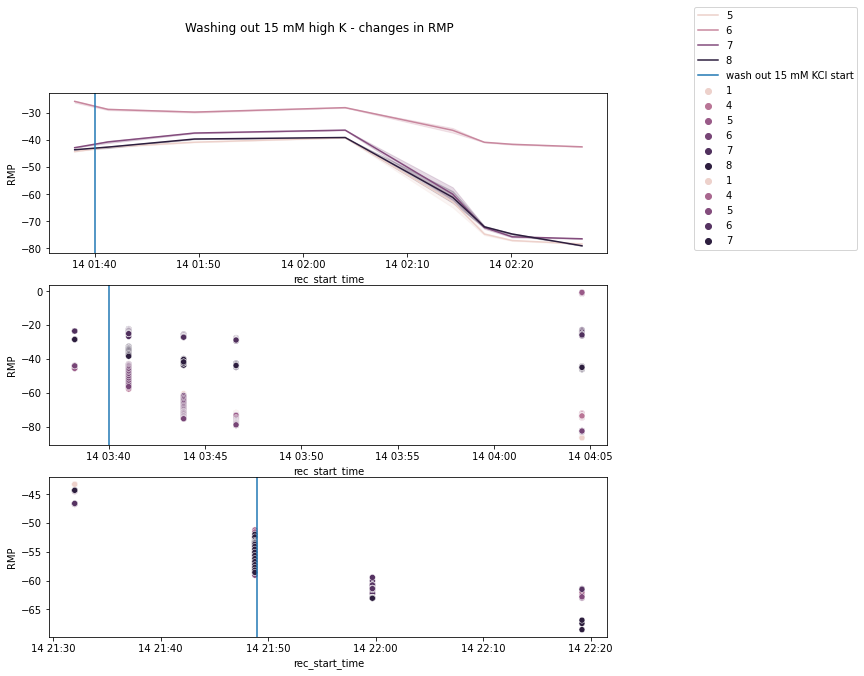

In [11]:
fig, ax = plt.subplots(3,1, figsize = (10,10)) 
sns.lineplot(ax = ax[0], data=df[df.slice == 'S2'], x="rec_start_time", y="RMP",hue = 'channel')
ax[0].axvline(x = wash_out_start_s2, label = 'wash out 15 mM KCl start')

sns.scatterplot(ax = ax[1], data=df[df.slice == 'S3'], x="rec_start_time", y="RMP",hue = 'channel')
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))
ax[1].axvline(x = wash_out_start_s3)

# sns.scatterplot(ax = ax[2], data=df[df.slice == 'S4'], x="rec_start_time", y="RMP",hue = 'channel')
# sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))
# ax[2].axvline(x = wash_out_start_s4)

sns.scatterplot(ax = ax[2], data=df[df.slice == 'S1_D2'], x="rec_start_time", y="RMP",hue = 'channel')
sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))
ax[2].axvline(x = wash_out_start_s1_d2)


fig.suptitle('Washing out 15 mM high K - changes in RMP')
plt.figlegend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

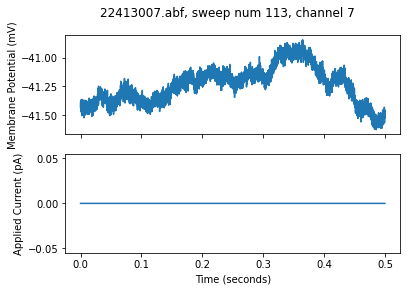

In [53]:
plot_trace(human_dir + '/data_verji/OP220413/22413007.abf', 112, 7)
#EPSP?

In [54]:
plot_trace(human_dir + '/data_verji/OP220413/22413005.abf', 298, 7) #high K for 2-3 mins

In [55]:
plot_trace(human_dir + '/data_verji/OP220413/22413016.abf', 13, 5) #recording in high K - spontaneous spikes in S2?

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## OP220615 <a name= "2">

patient age: 14  
region: frontal

Experiments
- wash in high K **8mM** (S5)
- wash out high K (S6-S8)

Results:
- reversable changes in RMP, no spiking


In [19]:
OP = 'OP220615'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)
summary_df = pd.read_excel(human_dir + '/data_verji/' + OP + '/data_tables/OP220615_RMPs_highK.xlsx')

In [20]:
summary_df

slice channel/condition  channel condition  resting_potential  num_peaks  \
0     S5        Ch1 before        1    before         -75.942419          0   
1     S5         Ch1 after        1     after         -50.001990          0   
2     S5        Ch2 before        2    before         -70.041412          0   
3     S5         Ch2 after        2     after         -53.016241          0   
4     S5        Ch3 before        3    before         -66.567627          0   
..   ...               ...      ...       ...                ...        ...   
59    S8         Ch6 after        6     after                NaN          0   
60    S8        Ch7 before        7    before         -68.342688          0   
61    S8         Ch7 after        7     after                NaN          0   
62    S8        Ch8 before        8    before         -67.225104          0   
63    S8         Ch8 after        8     after                NaN          0   

      exp_condition  
0    wash in high K  
1    wash in high K  
2    wash in high K  
3    wash in high K  
4    wash in high K  
..              ...  
59  wash out high K  
60  wash out high K  
61  wash out high K  
62  wash out high K  
63  wash out high K  

[64 rows x 7 columns]

Text(0.5, 1.0, 'wash in high K')

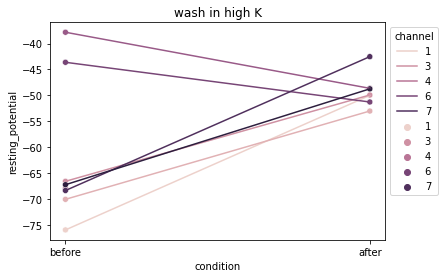

In [34]:
ax = sns.lineplot(data=summary_df[summary_df['slice'] == 'S5'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.scatterplot(ax = ax, data=summary_df[summary_df['slice'] == 'S5'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(summary_df['exp_condition'][summary_df['slice'] == 'S5'].values[0])


Text(0.5, 1.0, 'wash out high K')

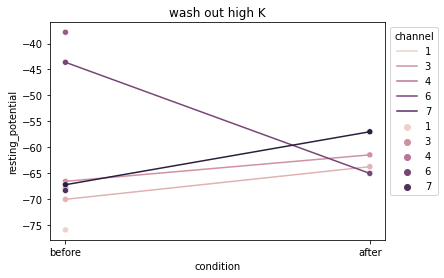

In [35]:
ax = sns.lineplot(data=summary_df[summary_df['slice'] == 'S6'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.scatterplot(ax = ax, data=summary_df[summary_df['slice'] == 'S6'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(summary_df['exp_condition'][summary_df['slice'] == 'S6'].values[0])

Text(0.5, 1.0, 'wash out high K')

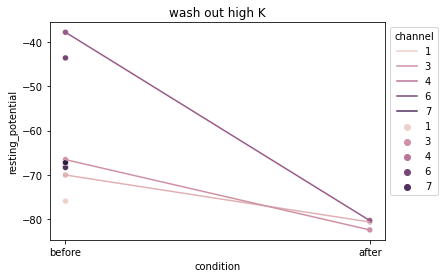

In [37]:
ax = sns.lineplot(data=summary_df[summary_df['slice'] == 'S8'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.scatterplot(ax = ax, data=summary_df[summary_df['slice'] == 'S8'], 
                     x="condition", y="resting_potential", hue = 'channel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(summary_df['exp_condition'][summary_df['slice'] == 'S8'].values[0])

In [56]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## OP221116 <a name= "3">

patient age: 35  
region: temporal

Experiments
- wash in, wash out, puff


In [3]:
OP = 'OP221116'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)
summary_df = pd.read_excel(work_dir + '/data_tables/OP221116_RMPs.xlsx')

### Puff experiment


In [4]:
plot_trace(work_dir + filenames[31], 10, 1) 

### Puff experiment
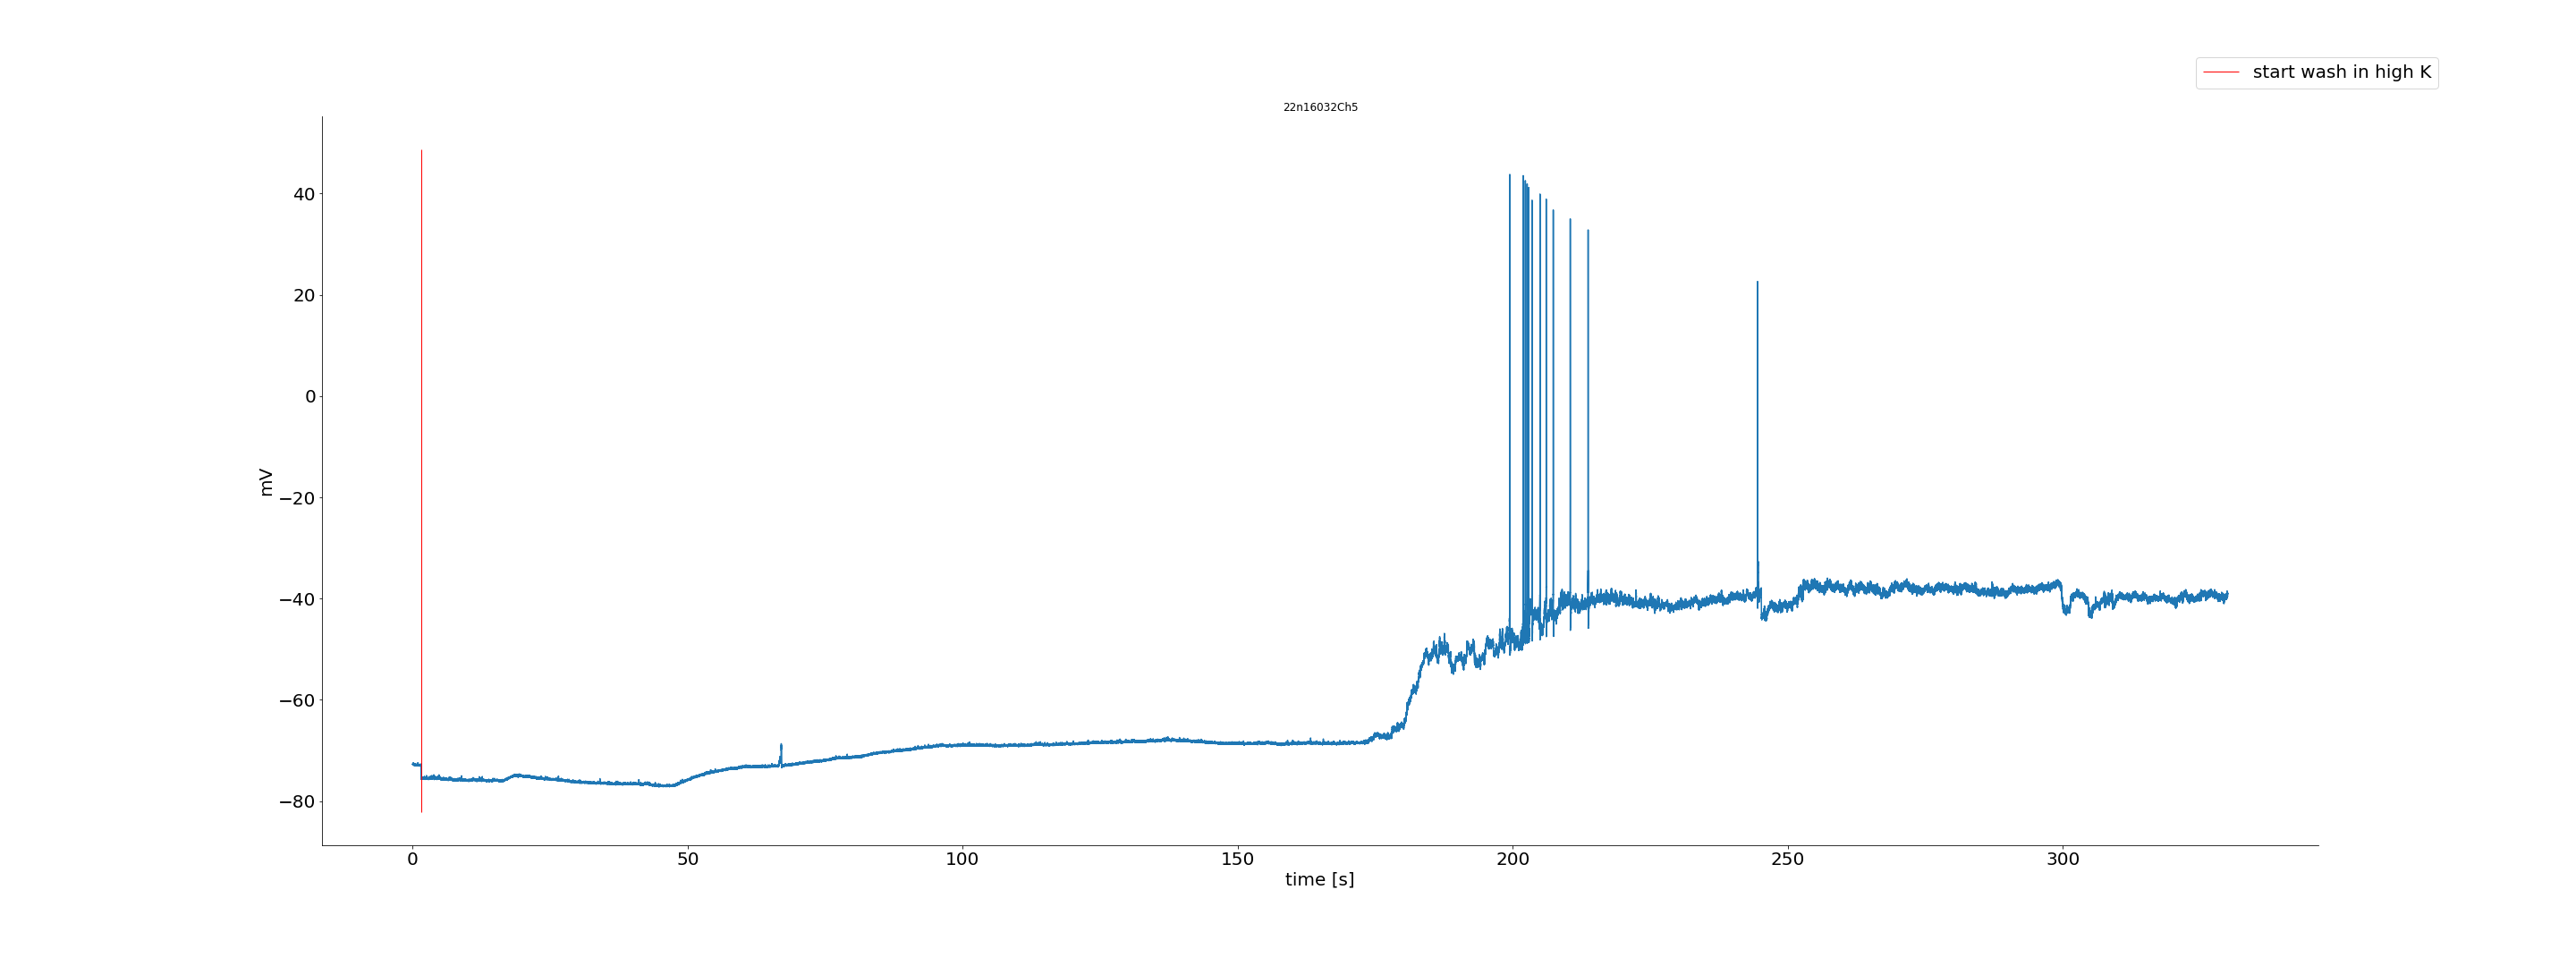

### change in RMP by washing in 8 mM high K

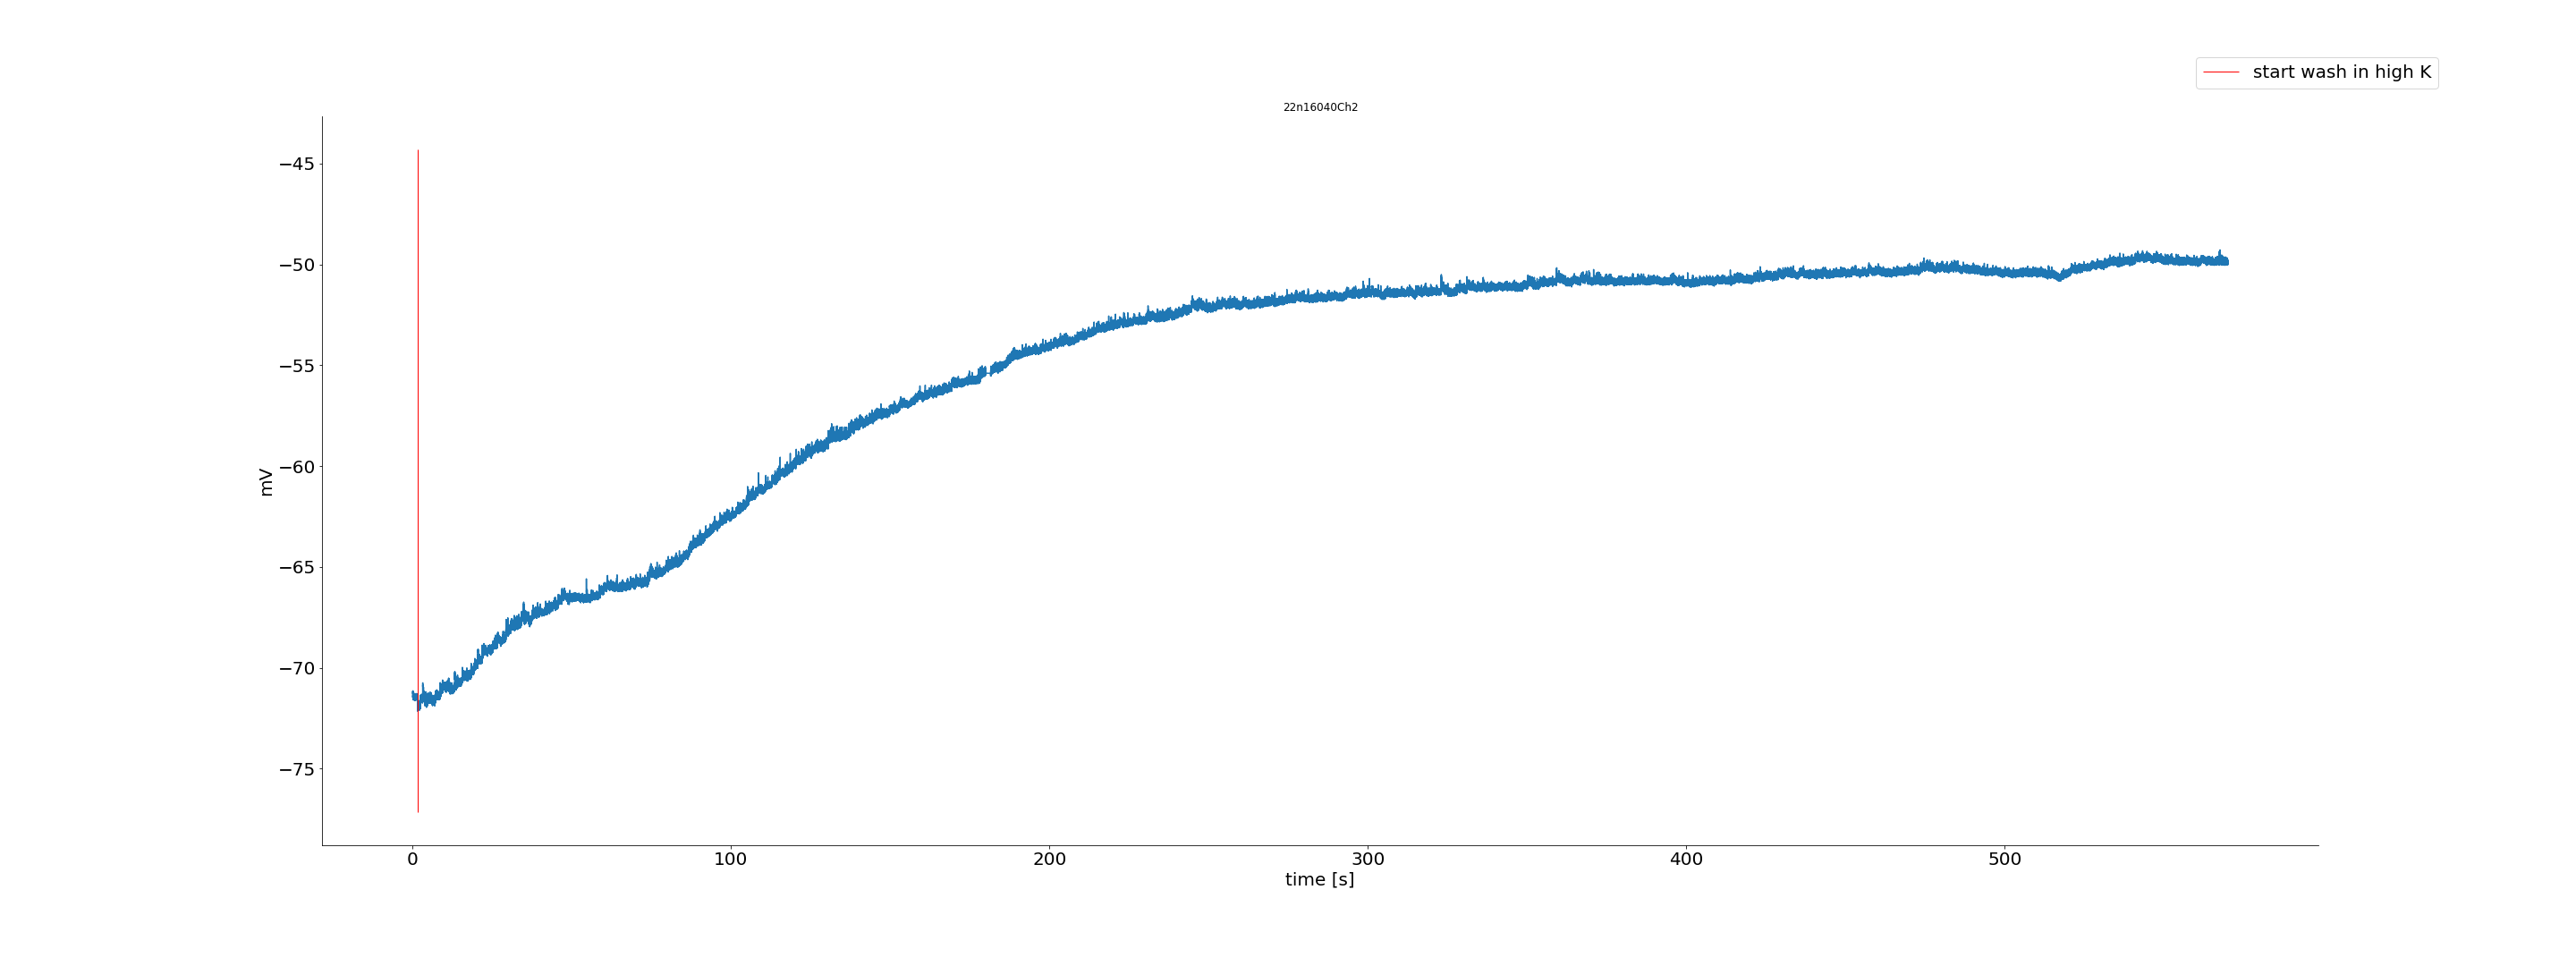

### Some spikes after washing in 8 mM KCl
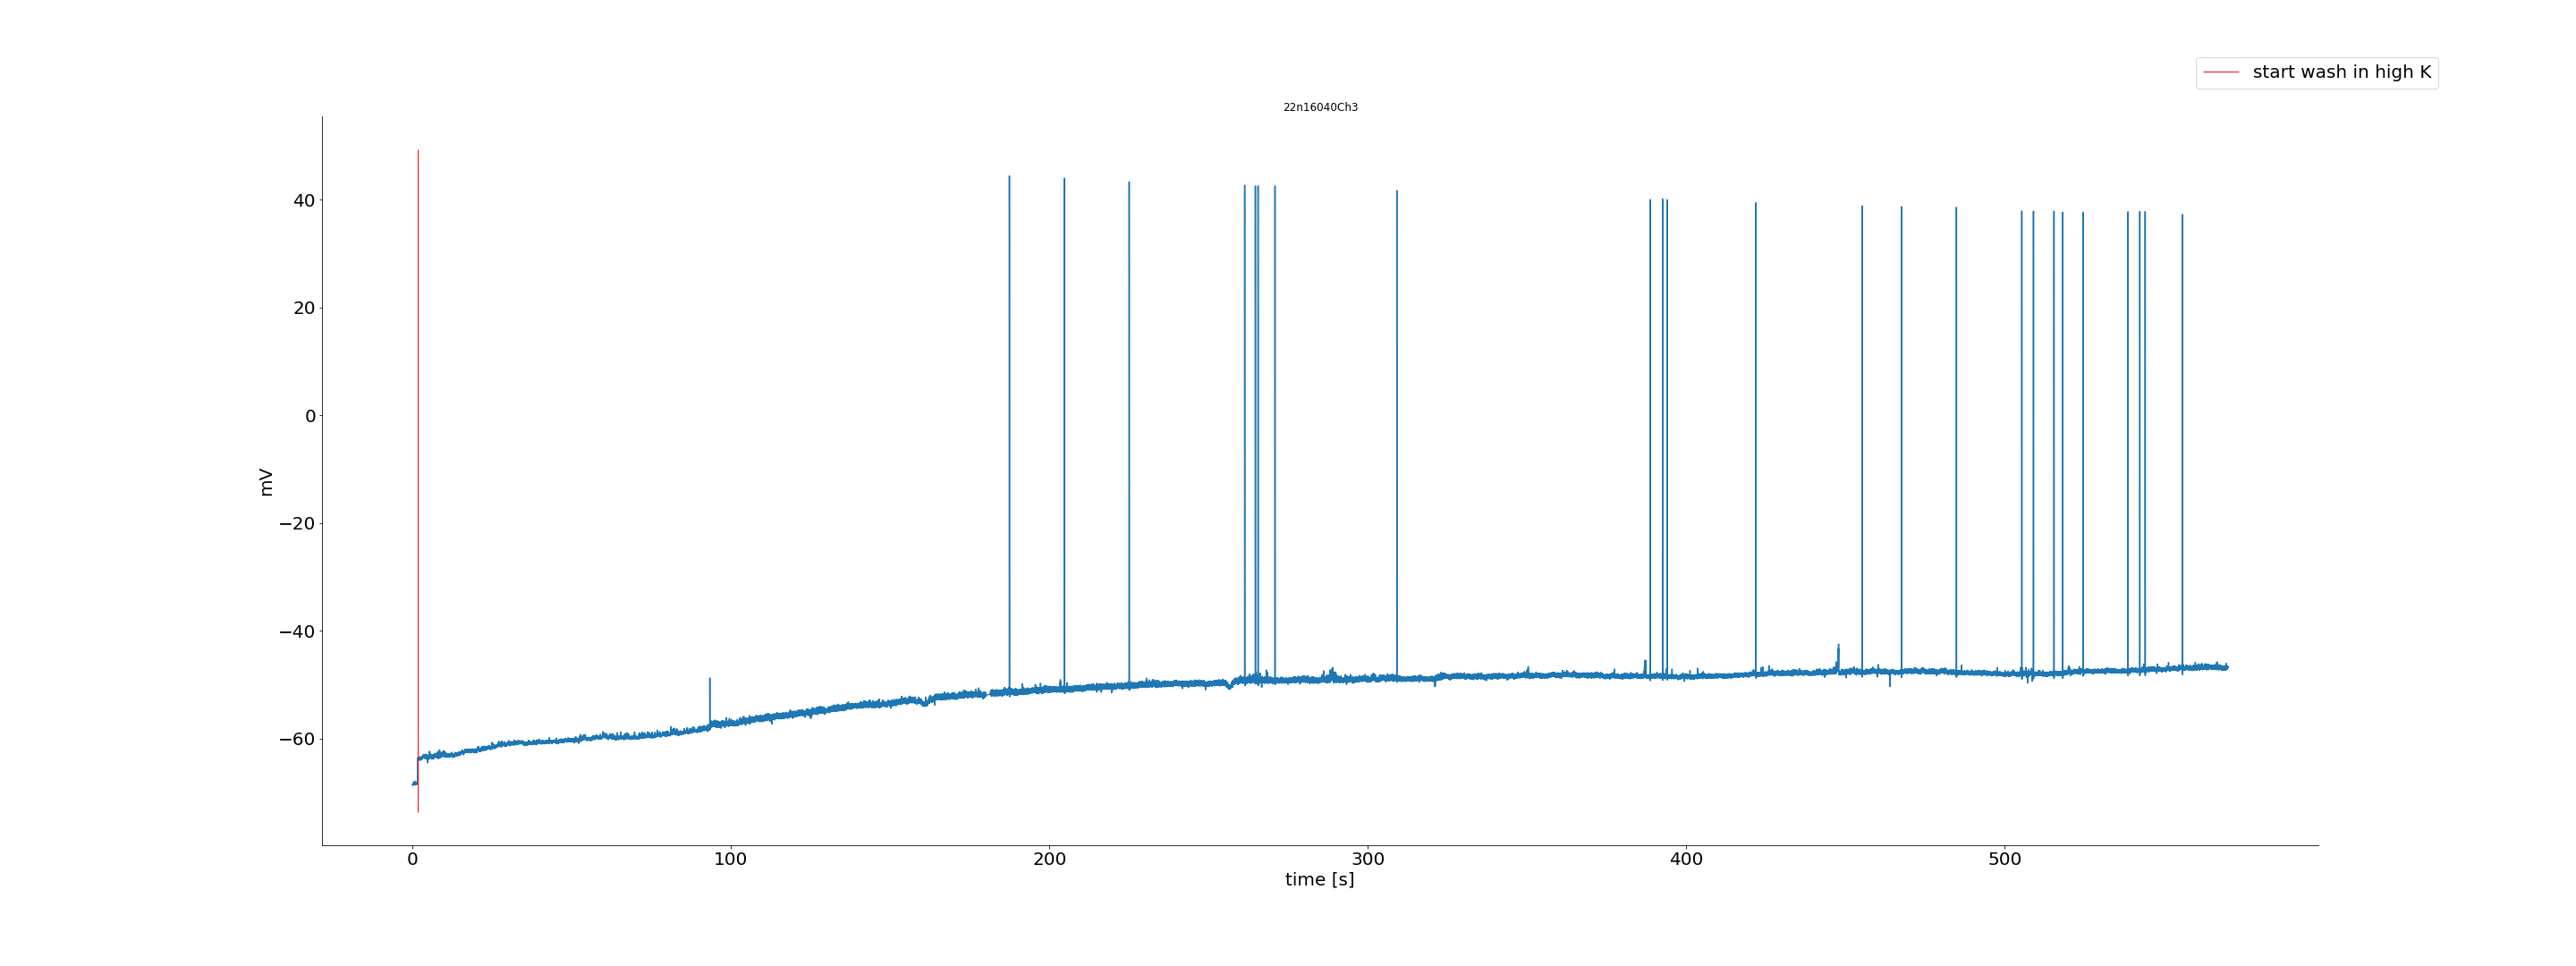

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## OP230126 <a name= "4">

patient age:  
region: frontal

Experiments
- wash in, wash out and puff


In [37]:
OP = 'OP230126'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)
summary_df = pd.read_excel(work_dir + '/data_tables/OP230126_RMPs.xlsx')

In [27]:
summary_df = summary_df.drop(summary_df[summary_df.exp_condition == 'puff high K'].index) #cells not healthy
summary_df = summary_df.drop(summary_df[(summary_df.slice == 'S1') & (summary_df.channel == 'Ch2')].index) #cells not healthy

In [29]:
ax = sns.scatterplot(data=summary_df[summary_df['slice'] == 'S1'], x="exp_condition", y="resting_potential", hue = 'channel')
#sns.lineplot(data=summary_df, x="exp_condition", y="resting_potential", hue = 'channel')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_title(summary_df['exp_condition'][summary_df['slice'] == 'S8'].values[0])

In [33]:
summary_df = summary_df.sort_values('exp_condition')

ax2 = sns.scatterplot(data=summary_df[summary_df['slice'] == 'S2'], x="exp_condition", y="resting_potential", hue = 'channel')
sns.lineplot(data=summary_df[summary_df['slice'] == 'S2'], 
             x="exp_condition", y="resting_potential", hue = 'channel')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))


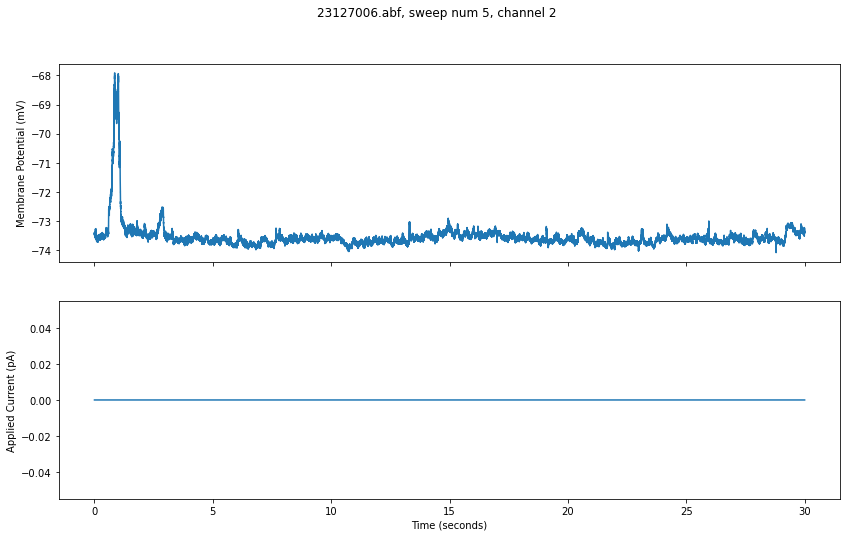

In [43]:
plot_trace(work_dir + filenames[5], 4, 2)
#more EPSPs

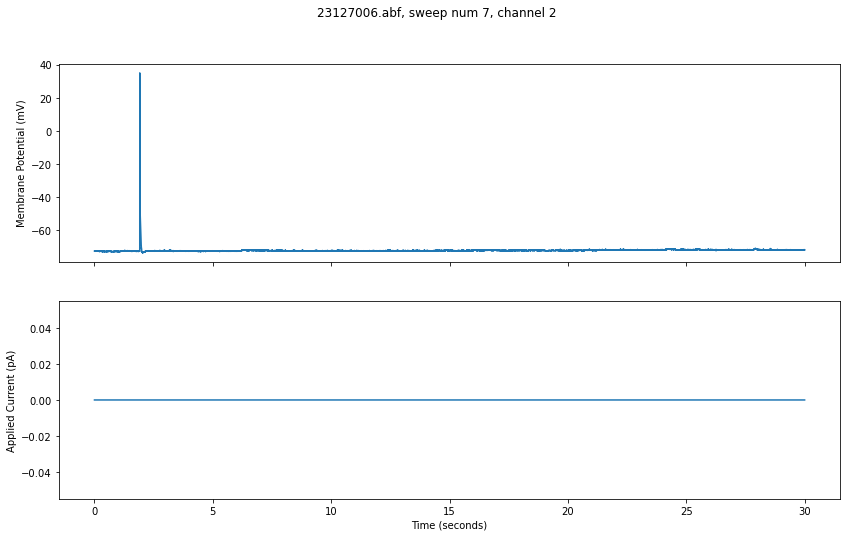

In [55]:
plot_trace(work_dir + filenames[5], 6, 2)

In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## OP230329 <a name= "5">

patient age: 8  
region: frontal

Experiments
 - Washing in high K (+8mM, +15 mM and + 40 mM) and recording LFPs 
   
Results
- no obvious effects of high K


In [57]:
OP = 'OP230329'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)


## OP230330 <a name= "6">

patient age: 35  
region: frontal

Experiments
- Loose cell attached recordings while washing in high K (+8mM, +15 mM and + 40 mM) 

In [132]:
OP = 'OP230330'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)
lab_book = pd.read_excel(work_dir + 'recording_lab_book_op230330.xlsx')

In [135]:
lab_book.protocol.values[1]

'baseline'

In [145]:
data_dict = hcf.load_traces(work_dir + filenames[0])
chan = 1
data = np.reshape(data_dict['Ch' + str(chan)][0], -1)
active_chans = [[1,2,6,7], np.arange(1,9)]

In [149]:
df_peaks = pd.DataFrame(columns=['fn', 'slice','channel','condition' ,'num_peaks'])
for chan in active_chans[1]:
    for i in range(11,len(filenames)):
        if lab_book.protocol.values[i+1] != 'baseline':
            continue
        data_dict = hcf.load_traces(work_dir + filenames[i])
        data = np.reshape(data_dict['Ch' + str(chan)][0], -1)
        peaks1 = peaks.detect_peaks(data, mph = 10, mpd = 10, edge='rising',
                                kpsh=True, show=False, title = 'Ch' + str(chan))
        if len(peaks1) <1: 
            continue
        #peaks1 = peaks.detect_peaks(data, mph = 10, mpd = 10, edge='rising',
             #                   kpsh=True, show=True, title = 'Ch' + str(chan))
        df_to_add = pd.DataFrame({'fn':filenames[i], 'channel':chan,'slice' :slice_names[i+1],
                                  'condition':lab_book.codition.values[i+1] ,
                                  'num_peaks':len(peaks1)}, index=[0])
        df_peaks = pd.concat([df_peaks.loc[:], df_to_add]).reset_index(drop=True)

KeyboardInterrupt: 

In [150]:
df_peaks.to_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/data/high_K_evaluation/OP230330_peaks_summary.xlsx')

In [ ]:
plot_trace(work_dir + '23330004.abf', 0, 1)

## OP230417 <a name= "7">
patient age: 4.5  
region: frontal

Experiments
- loose cell attached configuration, recording while washing in high K +8mM, +15 mM, +40 mM

## OP230914 <a name= "8">

In [162]:
OP = 'OP230914'
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)

In [4]:
data_events = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/analysis/event_analysis_resulöts.xlsx')

In [62]:
data_events = data_events.drop(columns = 'cell_ID')

In [63]:
def create_cell_ID(df):
    cell_IDs = []
    OPs = df.OP.tolist()
    slices = df.slice.tolist()
    chans = df.channel.tolist()
    for i in range(len(df)):
        cell_ID = OPs[i][2:] + slices[i] + str(chans[i])
        cell_IDs.append(cell_ID)
    df.insert(7, 'cell_ID', cell_IDs)
    return df


In [64]:
data_events = create_cell_ID(data_events)

OP slice  channel  hrs incubation    condition  sweep  \
0    OP230914    S1        3               0    Ctrl temp      5   
1    OP230914    S1        3               0    Ctrl temp      5   
2    OP230914    S1        3               0    Ctrl temp      5   
3    OP230914    S1        3               0    Ctrl temp      5   
4    OP230914    S1        3               0    Ctrl temp      5   
..        ...   ...      ...             ...          ...    ...   
304  OP230914    S4        6              18  high K temp     20   
305  OP230914    S4        6              18  high K temp     20   
306  OP230914    S4        6              18  high K temp     20   
307  OP230914    S4        6              18  high K temp     20   
308  OP230914    S4        6              18  high K temp     20   

     peak amp (mV)    cell_ID  
0         0.482756  230914S13  
1         0.444335  230914S13  
2         0.507271  230914S13  
3         0.811288  230914S13  
4         0.800420  230914S13  
..             ...        ...  
304       1.137360  230914S46  
305       0.335673  230914S46  
306       0.496085  230914S46  
307       0.631753  230914S46  
308       0.543492  230914S46  

[309 rows x 8 columns]

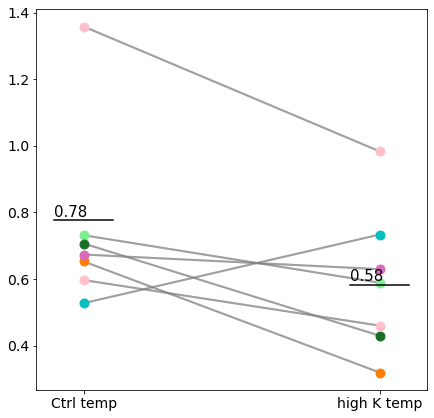

In [156]:
fig, axs = plt.subplots(1,1, figsize = (7,7))

#axs.scatter(data_events['condition'], data_events['peak amp (mV)'])

color_map = ['#ff7f00', '#DA67BA', '#7FEE8F','#186F25', 'pink', 'c', 'm', 'y'] # '#dede00'

for k, condition in enumerate(data_events['condition'].unique()):
    con_data = data_events[data_events['condition'] == condition]
    mean_cond = np.mean(con_data['peak amp (mV)'])
    axs.plot([0.9+k, 1.1+k], [mean_cond, mean_cond], c = 'k', linestyle = 'solid')
    axs.text(k+0.9, mean_cond + 0.01, str(round(mean_cond, 2)), size = 15)
    for s, slic in enumerate(data_events['slice'].unique()):
        slic_data = con_data[con_data['slice'] == slic] 
            
        for i_ch, chan in enumerate(slic_data['channel'].unique()):
            col = 2*s + i_ch  
            chan_data = slic_data[slic_data['channel'] == chan]
#             x = np.linspace(0.7+k, 1.3+k, len(chan_data))             
#             axs.scatter(x, chan_data['peak amp (mV)'], c = color_map[i_ch], alpha = 0.2)
            mean_chan = np.mean(chan_data['peak amp (mV)'])
            axs.scatter(k+1, mean_chan, c = color_map[col], s = 80)
        
        for c, cell in enumerate(slic_data['cell_ID'].unique()):
            #indx = index_s[c]
#             x_K = df_plot['x'].loc[df_plot['cell_ID_new'] == cell].tolist()[0]
#             x1 = [x_plot[0][c], x_K]
             y1 = np.mean(data_events['peak amp (mV)'][(data_events['cell_ID'] == cell) & (data_events['condition'] == 'Ctrl temp')])
             y2 = np.mean(data_events['peak amp (mV)'][(data_events['cell_ID'] == cell) & (data_events['condition'] == 'high K temp')])
#             op = df_plot['OP'][df_plot['cell_ID_new'] == cell].tolist()[0]
             axs.plot([1,2] , [y1,y2] , '-', linewidth = 2, alpha = 0.5, c = 'grey', zorder = 0)
        
axs.set_xticks(ticks = [1, 2], labels = data_events['condition'].unique().tolist(), size = 14)  
axs.tick_params(axis='y', labelsize=14)  


In [149]:
event_freqs = data_events.value_counts(subset = ['channel','condition','slice'], sort = False).to_frame()
event_freqs.columns = ['event_count']
event_freqs.reset_index()

channel    condition slice  event_count
0         2    Ctrl temp    S2           11
1         2    Ctrl temp    S4            6
2         2  high K temp    S2           15
3         2  high K temp    S4            2
4         3    Ctrl temp    S1           17
5         3  high K temp    S1           37
6         4    Ctrl temp    S1           45
7         4  high K temp    S1           55
8         6    Ctrl temp    S2           17
9         6    Ctrl temp    S4           11
10        6  high K temp    S2           36
11        6  high K temp    S4            6
12        7    Ctrl temp    S2           21
13        7  high K temp    S2           30

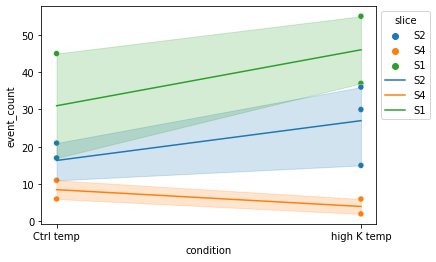

In [150]:
ax1 = sns.scatterplot(data = event_freqs, x = 'condition', y = 'event_count',hue = 'slice')
sns.lineplot(ax = ax1 ,data = event_freqs, x = 'condition', y = 'event_count',hue = 'slice')

sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

In [155]:
event_freqs.groupby(['condition']).mean().columns

Index(['event_count'], dtype='object')

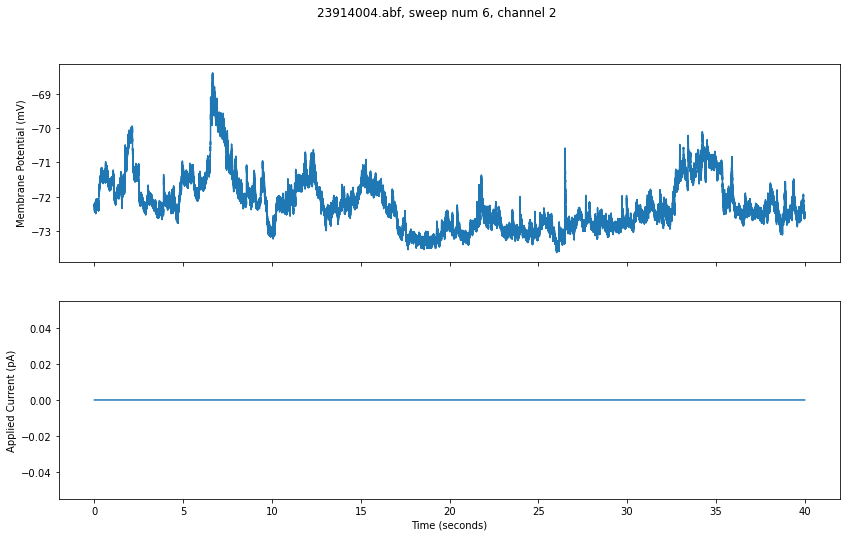

In [166]:
plot_trace(work_dir + filenames[3], 5, 2)